In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torch.backends.cudnn as cudnn

import torchvision
import torchvision.transforms as transforms

import os
import argparse

from models import *
from tqdm.notebook import tnrange, tqdm
from datetime import datetime

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [3]:
# Data
print('==> Preparing data..')
transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

trainset = torchvision.datasets.CIFAR10(
    root='./data', train=True, download=True, transform=transform_train)
trainloader = torch.utils.data.DataLoader(
    trainset, batch_size=128, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(
    root='./data', train=False, download=True, transform=transform_test)
testloader = torch.utils.data.DataLoader(
    testset, batch_size=100, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck')

==> Preparing data..
Files already downloaded and verified
Files already downloaded and verified


In [4]:
# Training
# tqdm Ref: https://adamoudad.github.io/posts/progress_bar_with_tqdm/
def train(epoch):
    net.train()
    train_loss = 0
    correct = 0
    total = 0
    with tqdm(trainloader) as tepoch:
        tepoch.set_description(f"Training Epoch {epoch}")
        for batch_idx, (inputs, targets) in enumerate(tepoch):
            inputs, targets = inputs.to(device), targets.to(device)
            optimizer.zero_grad()
            outputs = net(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()
            _, predicted = outputs.max(1)
            total += targets.size(0)
            correct += predicted.eq(targets).sum().item()

            tepoch.set_postfix(loss= '{:.2f}'.format(train_loss / (batch_idx + 1)), acc='{:.2f}%'.format(100.*correct/total))
        return train_loss / (batch_idx + 1), 100.*correct/total

In [5]:
# Test
def test_res(epoch, save_name):
    global best_acc
    net.eval()
    test_loss = 0
    correct = 0
    total = 0
    with torch.no_grad():
        with tqdm(testloader) as tepoch:
            tepoch.set_description(f"Testing Epoch {epoch}")
            for batch_idx, (inputs, targets) in enumerate(tepoch):
                inputs, targets = inputs.to(device), targets.to(device)
                outputs = net(inputs)
                loss = criterion(outputs, targets)

                test_loss += loss.item()
                _, predicted = outputs.max(1)
                total += targets.size(0)
                correct += predicted.eq(targets).sum().item()

                tepoch.set_postfix(loss='{:.2f}'.format(test_loss / (batch_idx + 1)), acc='{:.2f}%'.format(100.*correct/total))

    # Save checkpoint.
    acc = 100.*correct/total
    if acc > best_acc:
        print('Saving..')
        state = {
            'net': net.state_dict(),
            'acc': acc,
            'epoch': epoch,
        }
        if not os.path.isdir('checkpoint'):
            os.mkdir('checkpoint')
        torch.save(state, './checkpoint/' + save_name + '.pth')
        best_acc = acc
    return test_loss / (batch_idx + 1), 100.*correct/total

In [6]:
net = ResNet101()
net = net.to(device)
best_acc = 0
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.02,
                      momentum=0.9, weight_decay=5e-4)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=200)
# Execute Training
train_data = []
test_data = []
for epoch in tnrange(40, desc='Training and Testing Epochs'):
    train_d = train(epoch)
    train_data.append(train_d)
    test_d = test_res(epoch, 'resnet101')
    test_data.append(test_d)
    scheduler.step()

Training and Testing Epochs:   0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Saving..


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Saving..


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Saving..


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Saving..


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Saving..


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Saving..


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Saving..


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Saving..


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Saving..


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Saving..


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Saving..


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Saving..


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Saving..


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Saving..


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Saving..


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Saving..


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Saving..


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Saving..


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Saving..


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Saving..


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Saving..


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Saving..


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

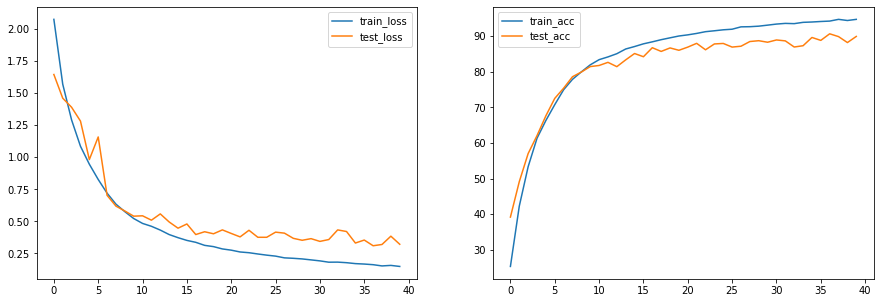

In [7]:
import matplotlib.pyplot as plt
losses = [item[0] for item in train_data]
tlosses = [item[0] for item in test_data]
fig, axs = plt.subplots(1, 2)
axs[0].plot(losses, label='train_loss')
axs[0].plot(tlosses, label='test_loss')
fig.set_size_inches(15, 5)
axs[0].legend()

tacces = [item[1] for item in test_data]
acces = [item[1] for item in train_data]
axs[1].plot(acces, label='train_acc')
axs[1].plot(tacces, label='test_acc')
axs[1].legend()

plt.show()

In [14]:
# Max Acces
print("Training Acc: ", max(acces), "Testing Acc: ", max(tacces))

Training Acc:  94.718 Testing Acc:  90.66


In [10]:
!jupyter nbconvert --to webpdf --allow-chromium-download ResNet101.ipynb

[NbConvertApp] Converting notebook ResNet101.ipynb to webpdf
[INFO] Starting Chromium download.
100%|████████████████████████████████████████| 109M/109M [00:02<00:00, 53.9Mb/s]
[INFO] Beginning extraction
^C
Traceback (most recent call last):
  File "/share/apps/python/3.8.6/intel/bin/jupyter-nbconvert", line 8, in <module>
    sys.exit(main())
  File "/share/apps/python/3.8.6/intel/lib/python3.8/site-packages/jupyter_core/application.py", line 270, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "/share/apps/python/3.8.6/intel/lib/python3.8/site-packages/traitlets/config/application.py", line 837, in launch_instance
    app.start()
  File "/share/apps/python/3.8.6/intel/lib/python3.8/site-packages/nbconvert/nbconvertapp.py", line 350, in start
    self.convert_notebooks()
  File "/share/apps/python/3.8.6/intel/lib/python3.8/site-packages/nbconvert/nbconvertapp.py", line 524, in convert_notebooks
    self.convert_single_notebook(notebook

In [11]:
!pyppeteer-install

[INFO] Starting Chromium download.
100%|█████████████████████████████████████████| 109M/109M [00:00<00:00, 283Mb/s]
[INFO] Beginning extraction
^C
